In [4]:
# pip install seaborn

### Load Libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Line Plots

In [8]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0,100,10))

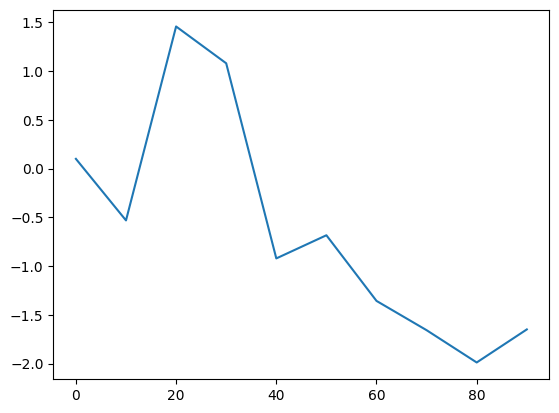

In [9]:
s.plot();

In [11]:
df = pd.DataFrame(np.random.standard_normal((10,4)).cumsum(0), 
                 index = np.arange(0,100,10),
                 columns=["A", "B", "C","D"])
df

,A,B,C,D
0,-0.584909,0.033127,-0.613336,1.080906
10,-0.769186,0.068805,0.447328,0.774709
20,-1.150026,-0.076308,-0.685171,1.283605
30,-1.755790,-0.107471,0.876670,1.428038
40,-1.583021,1.693957,1.562092,1.768961
50,-0.468829,1.781123,1.112986,1.531780
60,-0.192085,1.863761,1.531223,1.965273
70,-0.237902,1.139711,2.248361,1.003599
80,-0.596955,-0.262540,2.098002,-0.079033
90,-1.597516,0.847123,3.502119,0.625653


<Axes: >

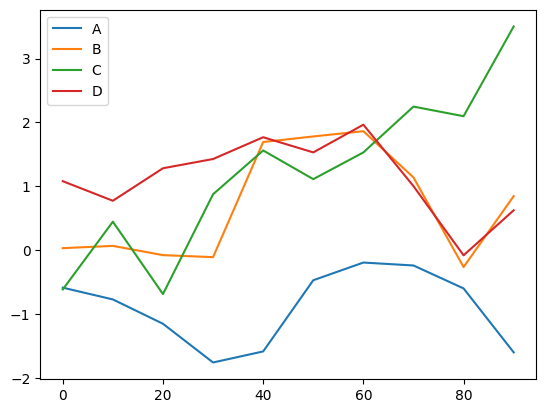

In [12]:
df.plot();

In [15]:
plt.style.use('grayscale')

<Axes: >

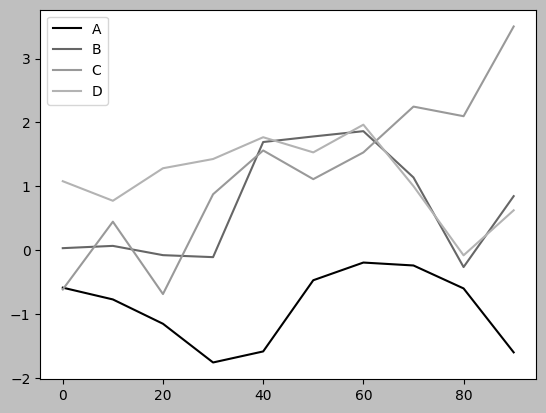

In [16]:
df.plot()

### Bar plot

<Axes: >

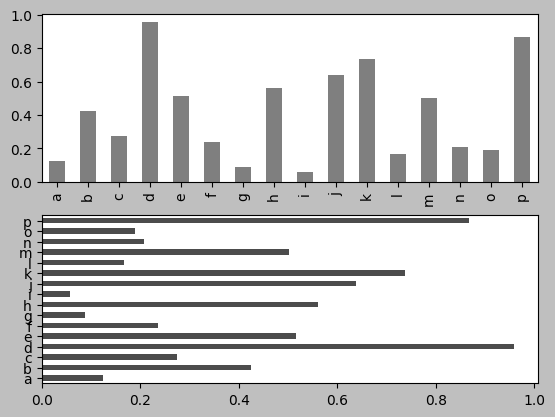

In [25]:
fig, axes = plt.subplots(2,1)

data = pd.Series(np.random.uniform(size=16), index = list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='black', alpha=0.5)
data.plot.barh(ax = axes[1], color='black', alpha = 0.7)

In [32]:
df = pd.DataFrame(np.random.uniform(size = (6,4)), 
                 index = ["one", "two", "three", "four", "five", "six"], 
                 columns=pd.Index(["A","B","C","D"], name = "Legend"))
df

Legend,A,B,C,D
one,0.568150,0.264297,0.245386,0.521708
two,0.799181,0.342831,0.875972,0.426237
three,0.130041,0.096645,0.701403,0.920863
four,0.705759,0.298998,0.999124,0.926167
five,0.800125,0.271648,0.548745,0.652482
six,0.760228,0.954531,0.954029,0.707850


<Axes: >

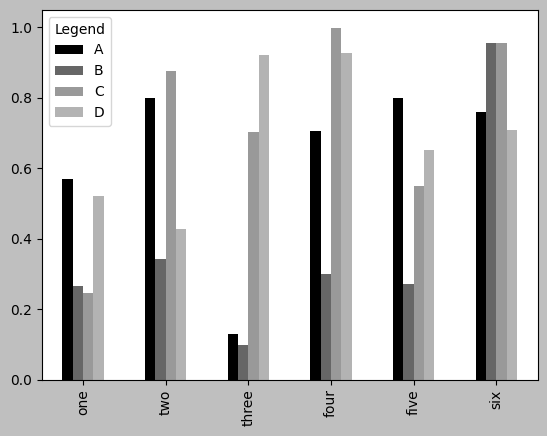

In [33]:
df.plot.bar()

<Axes: >

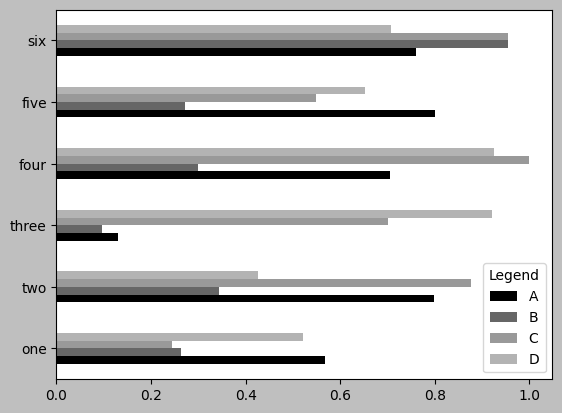

In [35]:
df.plot.barh()

<Axes: >

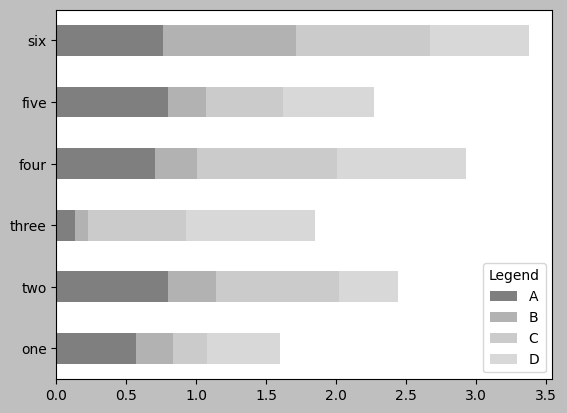

In [38]:
df.plot.barh(stacked=True, alpha=0.5)

In [39]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
party_count = pd.crosstab(tips['day'], tips['size'])
party_count

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [41]:
party_count = party_count.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_count

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [42]:
party_count = party_count.loc[:,2:5]
party_count

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [44]:
#Normalize to sum to 1 
party_pcts = party_count.div(party_count.sum(axis=1), axis='index')
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<Axes: xlabel='day'>

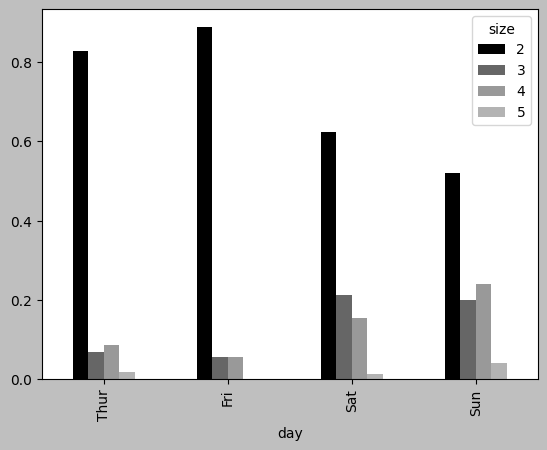

In [45]:
party_pcts.plot.bar()

<Axes: xlabel='day'>

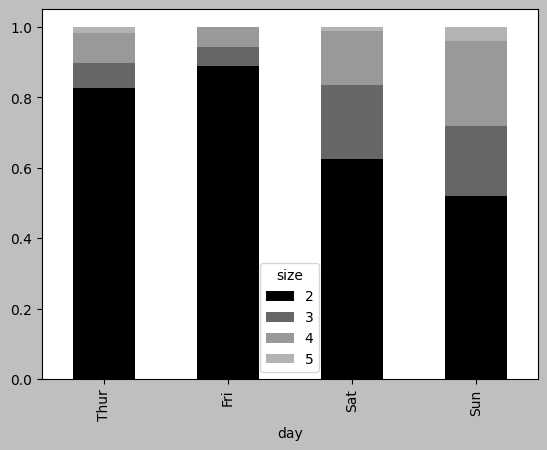

In [46]:
party_pcts.plot.bar(stacked=True)

In [47]:
tips['tip_pct'] = tips['tip']/(tips['total_bill']-tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

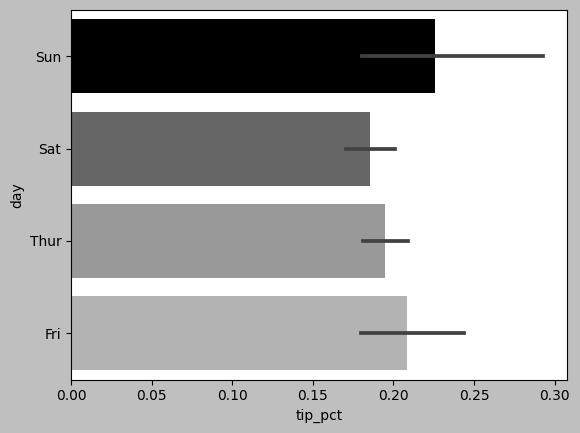

In [49]:
sns.barplot(x = "tip_pct", y = 'day', data = tips, orient="h")

<Axes: xlabel='tip_pct', ylabel='day'>

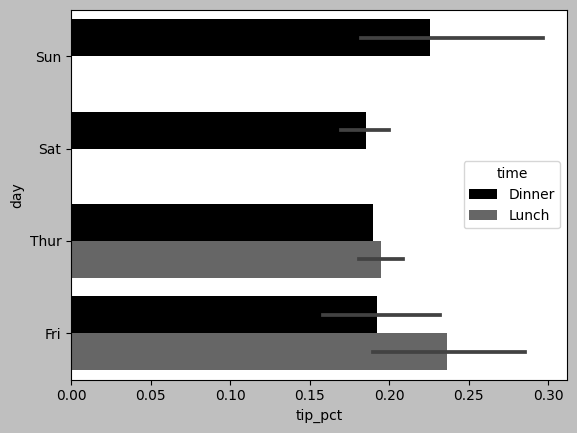

In [50]:
sns.barplot(x = "tip_pct", y = 'day', data = tips, orient="h", hue='time')

### Histograms and Density Plots

<Axes: ylabel='Frequency'>

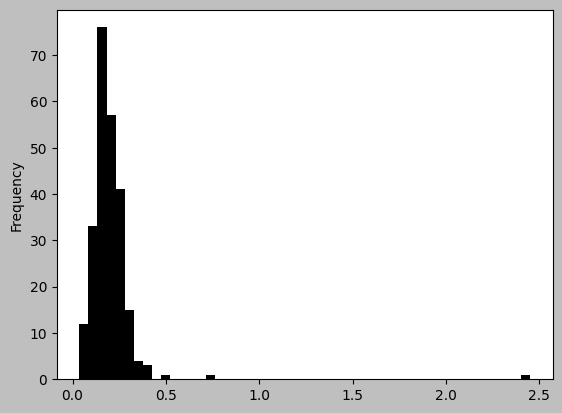

In [52]:
tips['tip_pct'].plot.hist(bins=50)

In [56]:
# pip install scipy

<Axes: ylabel='Density'>

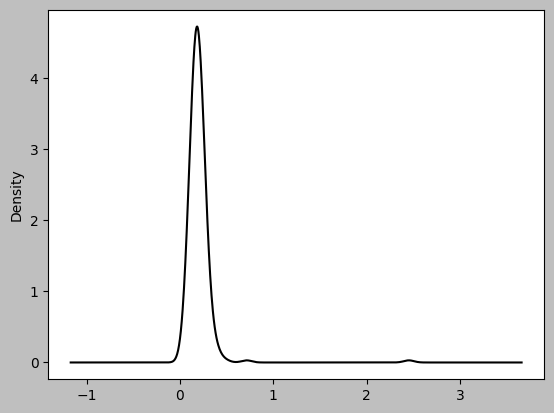

In [55]:
tips['tip_pct'].plot.density()

In [57]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2*np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))

<Axes: ylabel='Count'>

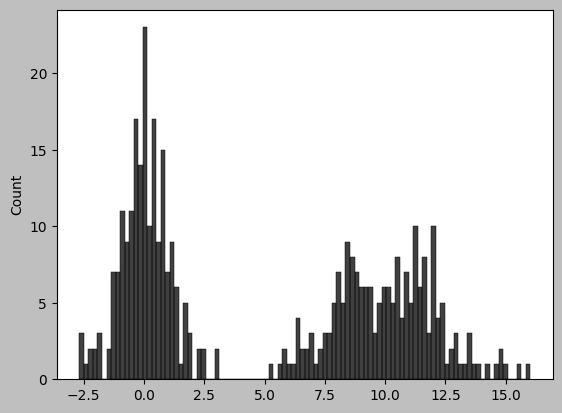

In [59]:
sns.histplot(values, bins=100, color = 'black')

### Scatter plot

In [62]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate','unemp']]

trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


<Axes: xlabel='m1', ylabel='unemp'>

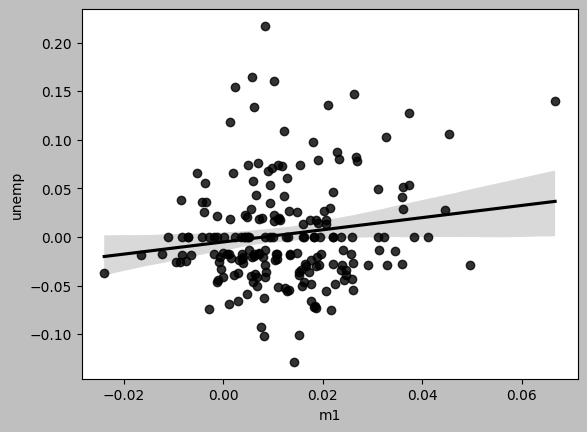

In [64]:
sns.regplot(x = "m1", y="unemp", data = trans_data)

### pairplot

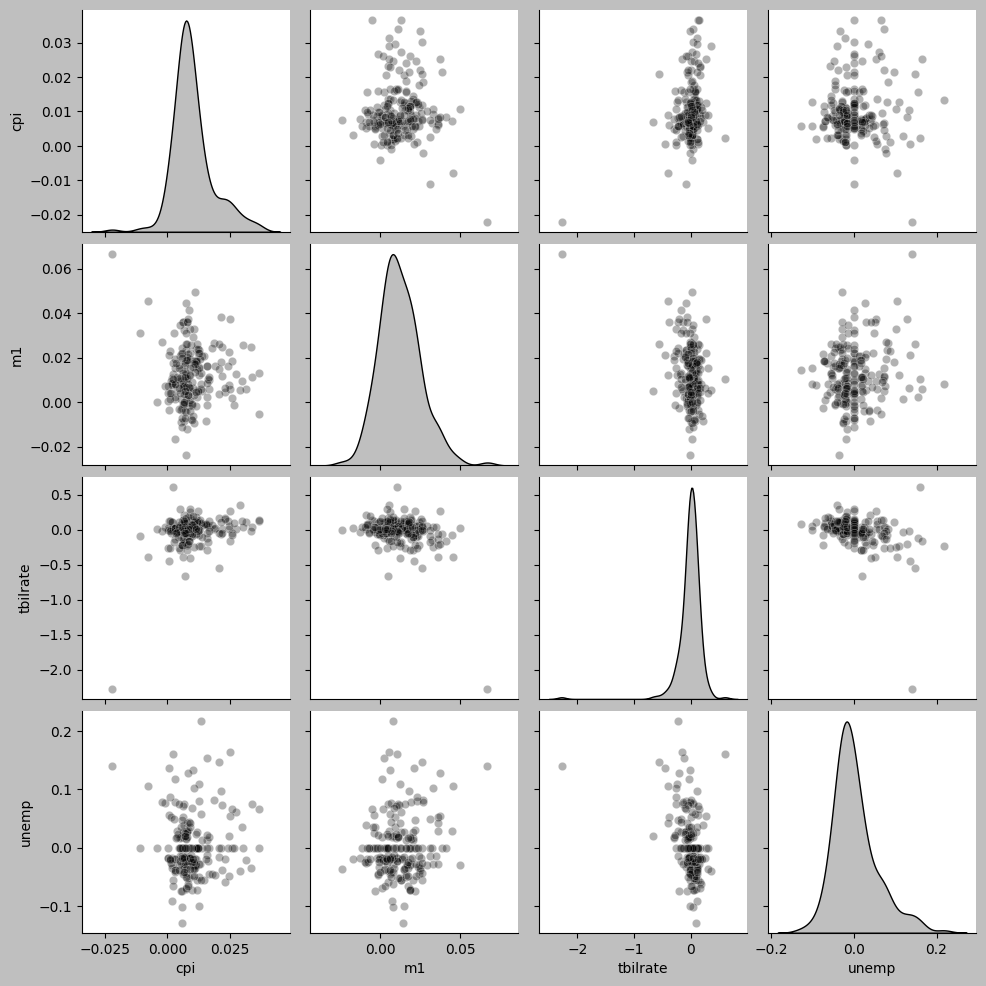

In [65]:
sns.pairplot(trans_data, diag_kind='kde',plot_kws={'alpha':0.3})

### Facet Grid and Categorical Data 

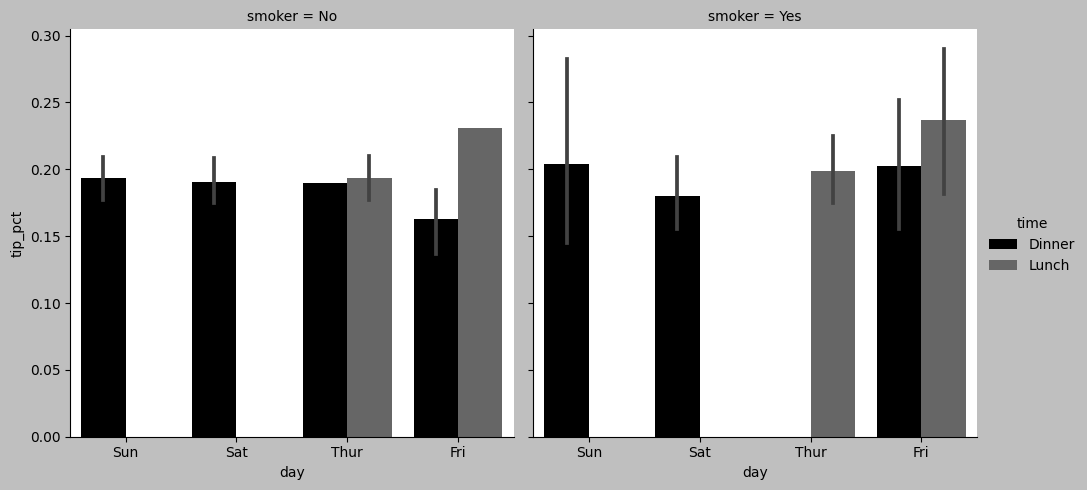

In [67]:
sns.catplot(x ='day', y="tip_pct", hue='time', col = "smoker", kind="bar", data=tips[tips.tip_pct <1])

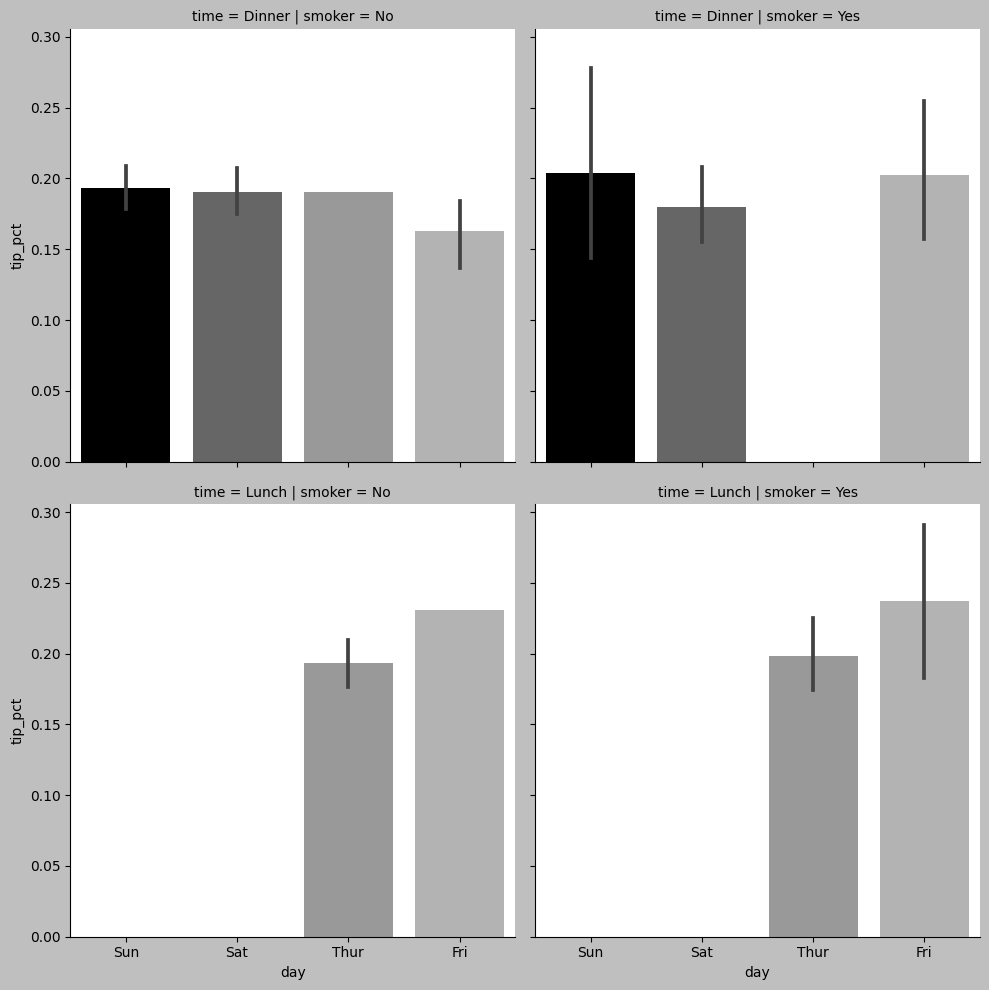

In [68]:
sns.catplot(x ='day', y="tip_pct", row='time', col = "smoker", kind="bar", data=tips[tips.tip_pct <1])

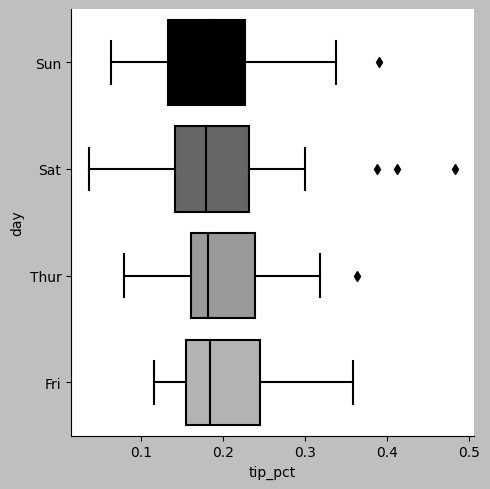

In [71]:
sns.catplot(y ='day', x="tip_pct",  kind="box", data=tips[tips.tip_pct <0.5])